In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import seaborn as sns

In [12]:
df = sns.load_dataset('titanic')
df = df[['survived', 'pclass', 'sex', 'age', 'fare', 'embarked']]
df['age'].fillna(df['age'].median(), inplace=True)
df.dropna(inplace=True)
df = pd.get_dummies(df, columns=['sex', 'embarked'], drop_first=True)
df.head()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_18588\1969048137.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)


,survived,pclass,age,fare,sex_male,embarked_Q,embarked_S
0,0,3,22.0,7.2500,True,False,True
1,1,1,38.0,71.2833,False,False,False
2,1,3,26.0,7.9250,False,False,True
3,1,1,35.0,53.1000,False,False,True
4,0,3,35.0,8.0500,True,False,True


In [13]:
X = df.drop('survived', axis=1)
y = df['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X, y[:5]

(     pclass   age     fare  sex_male  embarked_Q  embarked_S
 0         3  22.0   7.2500      True       False        True
 1         1  38.0  71.2833     False       False       False
 2         3  26.0   7.9250     False       False        True
 3         1  35.0  53.1000     False       False        True
 4         3  35.0   8.0500      True       False        True
 ..      ...   ...      ...       ...         ...         ...
 886       2  27.0  13.0000      True       False        True
 887       1  19.0  30.0000     False       False        True
 888       3  28.0  23.4500     False       False        True
 889       1  26.0  30.0000      True       False       False
 890       3  32.0   7.7500      True        True       False
 
 [889 rows x 6 columns],
 0    0
 1    1
 2    1
 3    1
 4    0
 Name: survived, dtype: int64)

In [14]:
train_accuracies = []
test_accuracies = []
depths = range(1, 21)

for depth in depths:
    clf = DecisionTreeClassifier(max_depth=depth,min_samples_split=10, random_state=42)
    clf.fit(X_train, y_train)
    train_acc = accuracy_score(y_train, clf.predict(X_train))
    test_acc = accuracy_score(y_test, clf.predict(X_test))
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

print("Train Accuracies:", train_accuracies)
print("Test Accuracies:", test_accuracies)

Train Accuracies: [0.7834036568213784, 0.7834036568213784, 0.8284106891701828, 0.8396624472573839, 0.8466947960618847, 0.8551336146272855, 0.8818565400843882, 0.8874824191279888, 0.8987341772151899, 0.9015471167369902, 0.9029535864978903, 0.9113924050632911, 0.9142053445850914, 0.9170182841068917, 0.9170182841068917, 0.9170182841068917, 0.9170182841068917, 0.9170182841068917, 0.9170182841068917, 0.9170182841068917]
Test Accuracies: [0.797752808988764, 0.797752808988764, 0.8202247191011236, 0.8089887640449438, 0.8089887640449438, 0.7921348314606742, 0.7696629213483146, 0.7696629213483146, 0.797752808988764, 0.7921348314606742, 0.7865168539325843, 0.797752808988764, 0.7921348314606742, 0.7865168539325843, 0.7865168539325843, 0.7865168539325843, 0.7865168539325843, 0.7865168539325843, 0.7865168539325843, 0.7865168539325843]


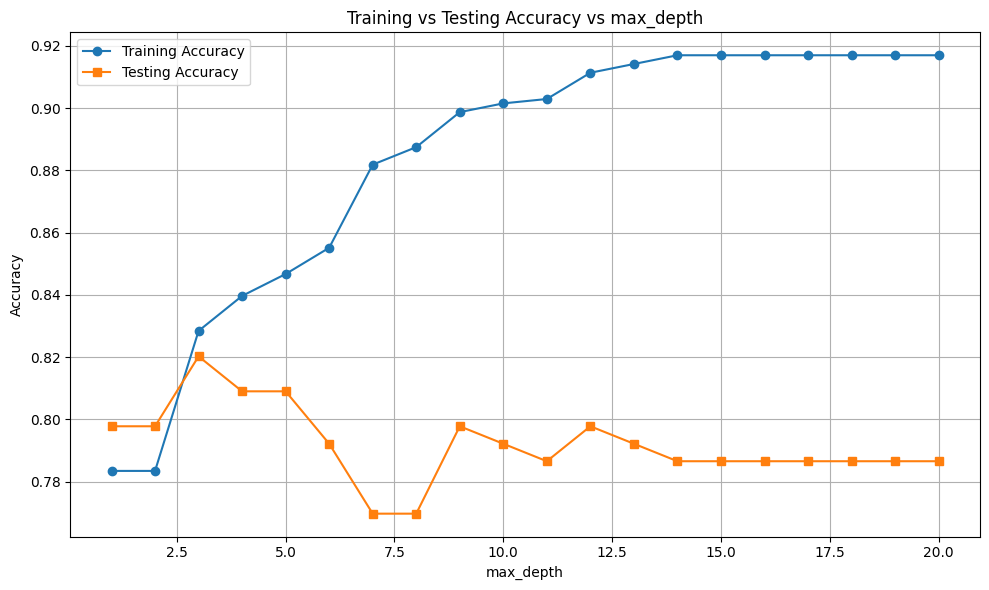

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(depths, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(depths, test_accuracies, label='Testing Accuracy', marker='s')
plt.title('Training vs Testing Accuracy vs max_depth')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Observations :- 
- If training accuracy is high but testing accuracy drops → overfitting. 
- If both accuracies are low → underfitting. 
- Ideal depth is where both accuracies are relatively high and close.